# opencv와 pytesseract를 이용한 자동차 번호 인식

### module import

In [63]:
import cv2
import pytesseract
import imutils
import numpy as np
import matplotlib.pyplot as plt

### 테스트 이미지 로드

In [2]:
img = cv2.imread('/Users/okchuri/project/codestates/CP1/data/images/Cars0.png')

### height, width, channel 확인

In [5]:
height, width, channel = img.shape
print(f'height = {height}, width = {width}, channel = {channel}')

height = 268, width = 500, channel = 3


### 이미지 확인

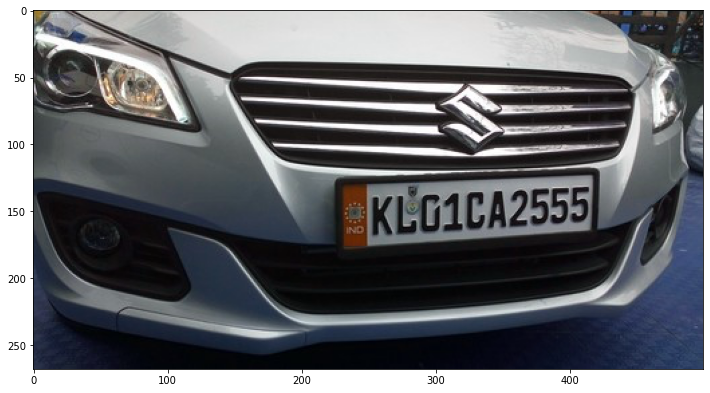

In [6]:
plt.figure(figsize=(12, 12))
plt.imshow(img, cmap='gray')

### 이미지 Resize

In [64]:
img = imutils.resize(img, width=500)

### 번호판 찾기 위하여 Gray Scale로 변경 (channel 정보 사라짐)

In [65]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [66]:
height, width = gray_img.shape
print(f'height = {height}, width = {width}')

height = 268, width = 500


### Gray Scale로 변경되 이미지 확인

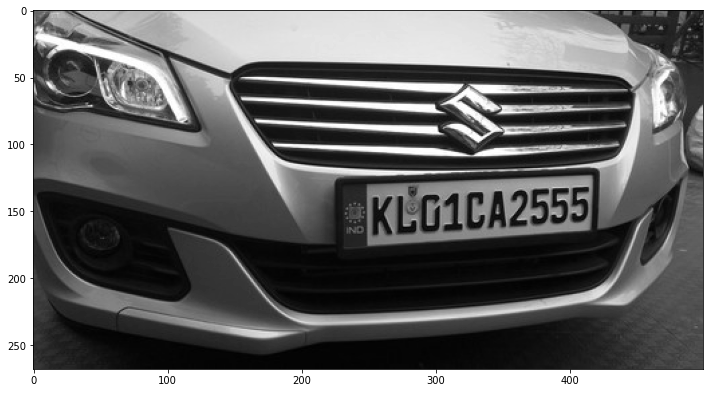

In [67]:
plt.figure(figsize=(12, 12))
plt.imshow(gray_img, cmap='gray')

### Image의 Noise 제거

In [68]:
blurred_img = cv2.bilateralFilter(gray_img, 11, 17, 17)

### Canny

In [69]:
edged_img = cv2.Canny(blurred_img, 30, 200)

### Noise 제거 및 Threshold 정리 된 이미지 확인

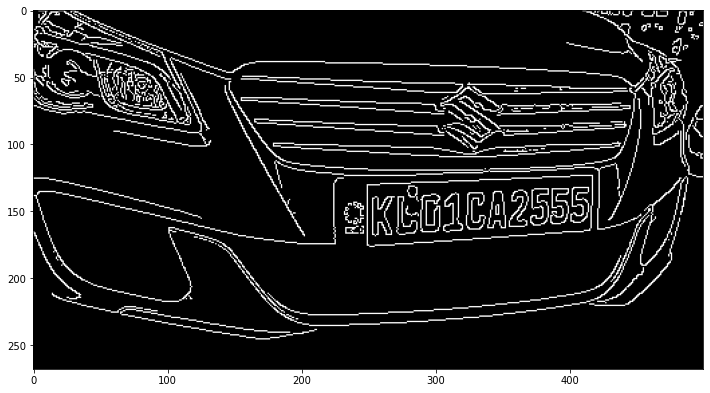

In [71]:
plt.figure(figsize=(12, 12))
plt.imshow(edged_img, cmap='gray')

### Contour 찾기

In [72]:
contours, _ = cv2.findContours(
    edged_img,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

### 찾은 Contour 그리기

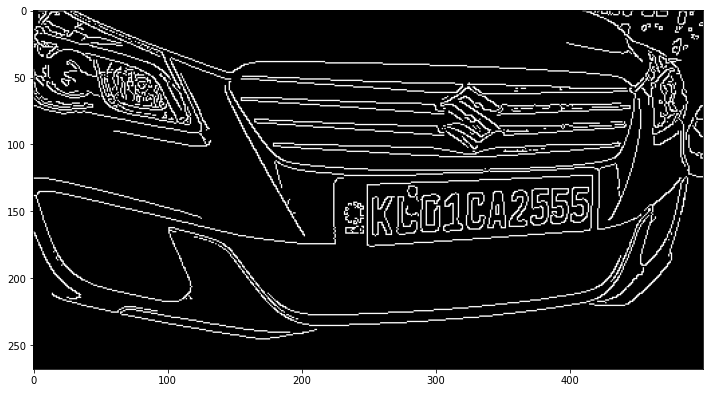

In [74]:
temp_img = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_img, contours=contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(12,12))
plt.imshow(temp_img, cmap='gray')

### Contour를 사각형 형태로 그리기

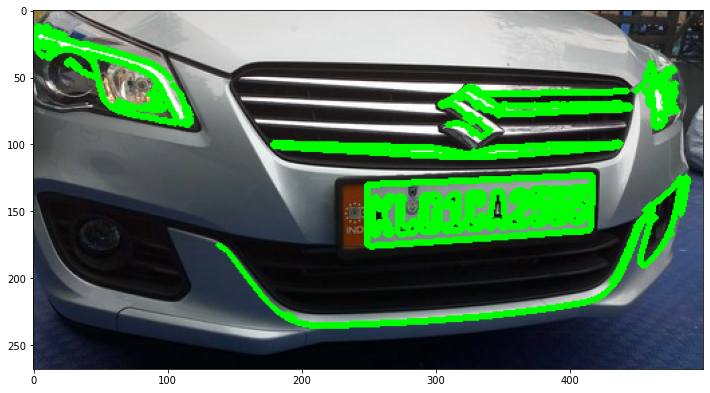

In [77]:
contours =sorted(contours, key=cv2.contourArea, reverse=True)[:30]
screenCnt = None
img2 = img.copy()
cv2.drawContours(img2, contours, -1, (0,255, 0), 3)

plt.figure(figsize=(12, 12))
plt.imshow(img2, cmap='gray')

### Contour의 사이즈를 확인하여, 번호판의 번호가 아닐 것 같은 이미지는 삭제한다.

In [80]:
new_img = []
for c in contours:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:   # chooses counters with 4 corners
        screenCnt = approx
        x,y,w,h = cv2.boundingRect(c)
        new_img=img[y:y+h, x:x+w]
#         idx+=1
        break

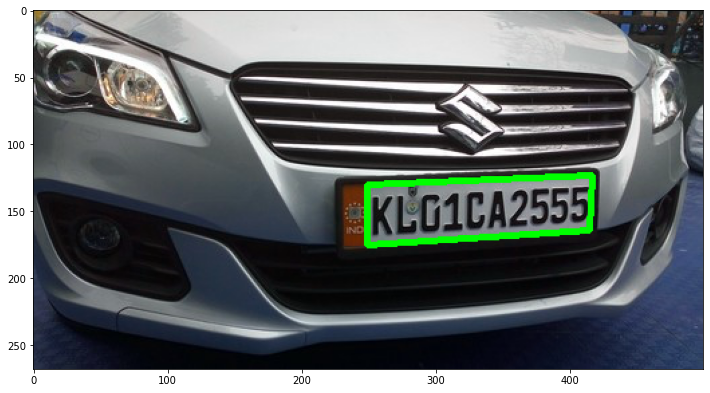

In [82]:
cv2.drawContours(img, [screenCnt], -1, (0,255,0), 3)
plt.figure(figsize=(12, 12))
plt.imshow(img, cmap='gray')